<a href="https://colab.research.google.com/github/Madhusudan2005/ElevateLabs-Task1/blob/main/ElevatesLab_Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import tools from scikit-learn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
# Import the load_iris function
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset from scikit-learn
iris = load_iris()
X = iris.data
y = iris.target

# Create a Pandas DataFrame for easier visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

print("Dataset Head:")
print(df.head())

# Split data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

print("\nShape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

Dataset Head:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Shape of X (features): (150, 4)
Shape of y (target): (150,)


In [6]:
# 1. Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (105, 4)
Testing set shape: (45, 4)


In [7]:
# Initialize the KNeighbors Classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training data
knn.fit(X_train, y_train)

print("KNN model trained with k=5.")

KNN model trained with k=5.


Accuracy: 1.00

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


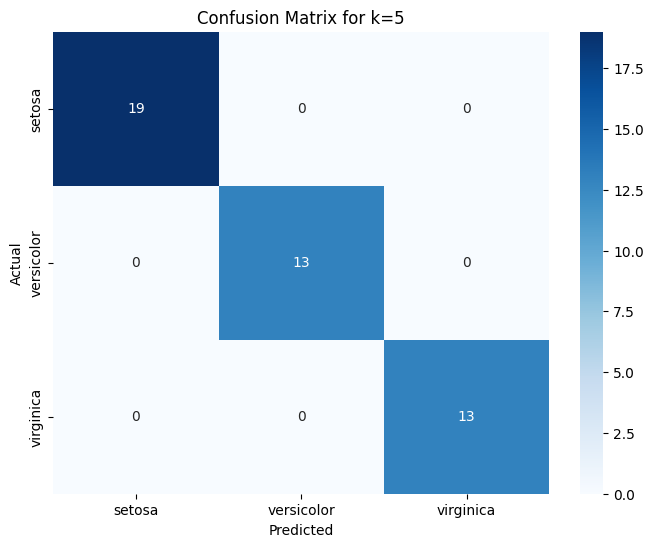


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [8]:
# Make predictions on the test data
y_pred = knn.predict(X_test)

# 1. Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# 2. Generate the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# For a better visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for k=5')
plt.show()

# 3. Generate the Classification Report
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("\nClassification Report:")
print(class_report)

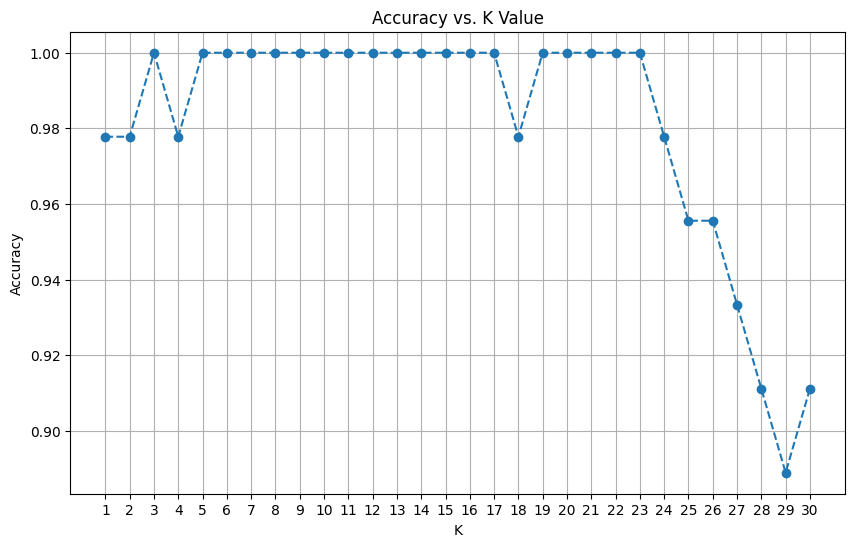

In [9]:
# Experiment with different values of K from 1 to 30
k_range = range(1, 31)
accuracies = []

for k in k_range:
    knn_test = KNeighborsClassifier(n_neighbors=k)
    knn_test.fit(X_train, y_train)
    y_pred_test = knn_test.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_test))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, marker='o', linestyle='dashed')
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

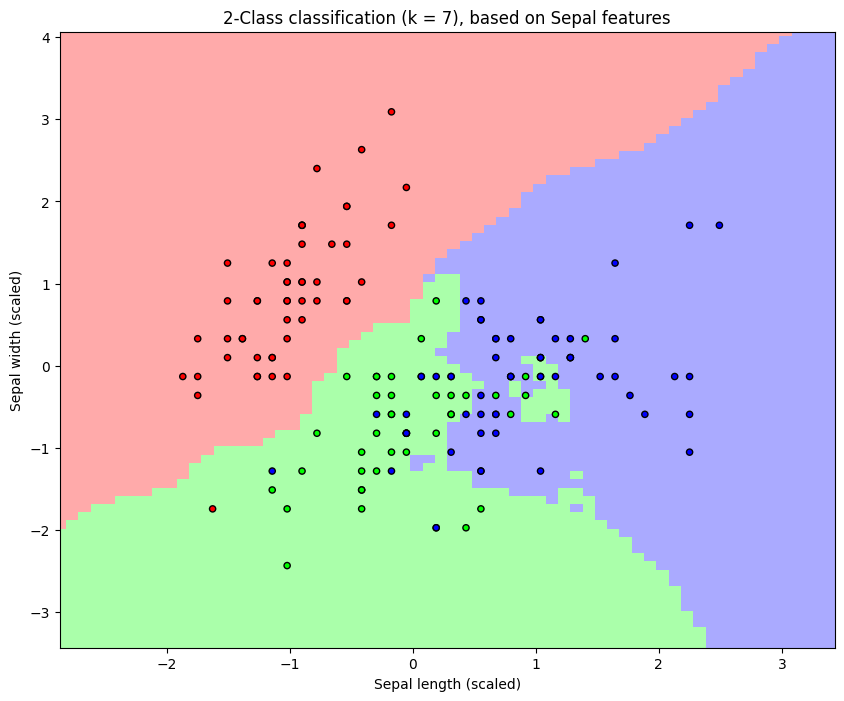

In [10]:
# We will use the first two features for visualization
# We need to re-train the model using only these two features
X_vis = X_scaled[:, :2] # Use only the first two scaled features
y_vis = y

# Train a new KNN model
knn_vis = KNeighborsClassifier(n_neighbors=7) # Choosing k=7 based on our plot above
knn_vis.fit(X_vis, y_vis)

# Create a mesh grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict for every point in the mesh grid
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary
plt.figure(figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = 7), based on Sepal features")
plt.xlabel('Sepal length (scaled)')
plt.ylabel('Sepal width (scaled)')
plt.show()